# 📊 数据分析与机器学习示例

- **步骤 1：** 创建并分析示例数据
- **步骤 2：** 构建一个简单的线性回归模型
- **步骤 3：** 使用交互式小工具演示

本 Notebook 展示了如何使用 Python 进行数据处理、模型训练和可视化操作。


数据预览：
          日期  销售额
0 2024-01-01  258
1 2024-01-02  169
2 2024-01-03  272
3 2024-01-04  480
4 2024-01-05  365
5 2024-01-06  310
6 2024-01-07  271
7 2024-01-08  220
8 2024-01-09  294
9 2024-01-10  213


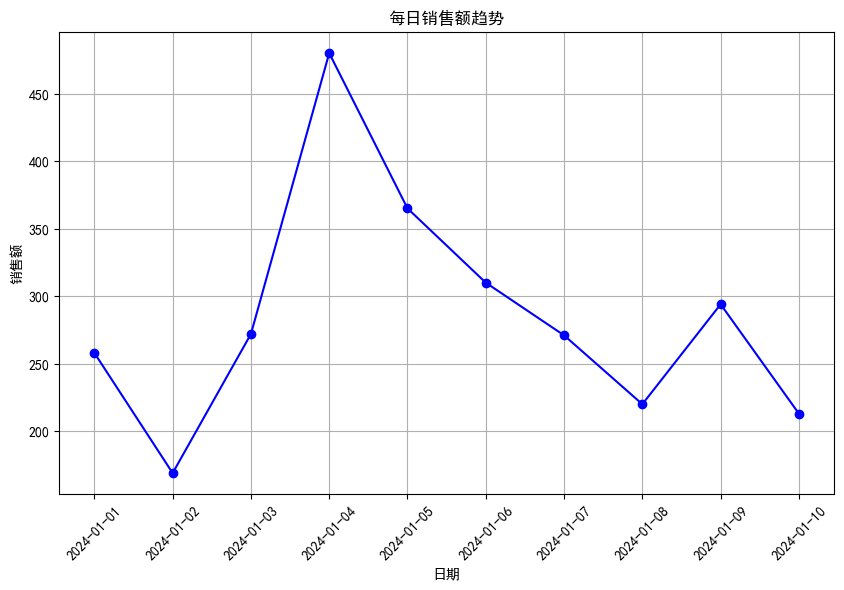

均方误差 (MSE): 3.15


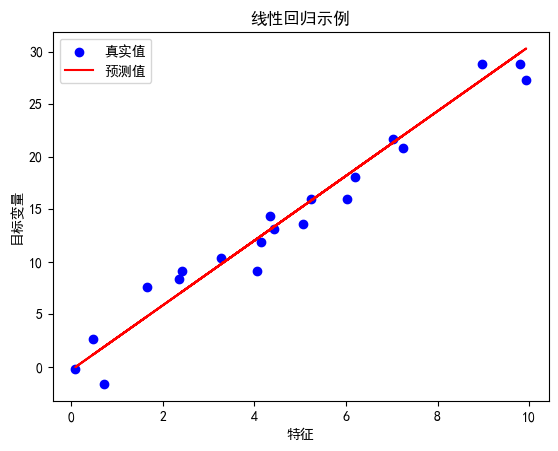

IntSlider(value=10, description='选择数字:', min=1)

In [2]:
# 导入库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import ipywidgets as widgets
from IPython.display import display

# 设置 Matplotlib 支持中文（可选）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 负号正常显示


# 创建一个简单的数据集
data = {
    '日期': pd.date_range(start='2024-numpy-numpy', periods=10, freq='D'),
    '销售额': np.random.randint(100, 500, 10)
}

# 转换为 Pandas DataFrame
df = pd.DataFrame(data)

# 打印数据预览
print("数据预览：")
print(df)

# 绘制销售额折线图
plt.figure(figsize=(10, 6))
plt.plot(df['日期'], df['销售额'], marker='o', linestyle='-', color='b')
plt.title('每日销售额趋势')
plt.xlabel('日期')
plt.ylabel('销售额')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# 生成示例数据（特征X和目标变量y）
X = np.random.rand(100, 1) * 10  # 特征
y = 3 * X.squeeze() + np.random.randn(100) * 2  # 目标变量（带噪声的线性关系）

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建线性回归模型并训练
model = LinearRegression()
model.fit(X_train, y_train)

# 使用模型预测
y_pred = model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
print(f"均方误差 (MSE): {mse:.2f}")

# 可视化预测结果
plt.scatter(X_test, y_test, color='blue', label='真实值')
plt.plot(X_test, y_pred, color='red', label='预测值')
plt.title('线性回归示例')
plt.xlabel('特征')
plt.ylabel('目标变量')
plt.legend()
plt.show()


# 创建一个交互式小工具：滑块
slider = widgets.IntSlider(value=10, min=1, max=100, step=1, description='选择数字:')
display(slider)





In [2]:
import pandas as pd
# 创建一个示例 DataFrame
data = {
    '姓名': ['张三', '李四', '王五'],
    '年龄': [25, 30, 35],
    '城市': ['北京', '上海', '广州']
}
df = pd.DataFrame(data)
display(df)




,姓名,年龄,城市
0,张三,25,北京
1,李四,30,上海
2,王五,35,广州


In [5]:
import numpy as np

a = np.ones(3, dtype=np.int32)
b = np.linspace(0, np.pi, 3)
print(b.dtype.name)
c = a + b
print(c.dtype.name)
d = np.exp(c * 1j) # d 是一个复数数组
print(d.dtype.name)
print(d)

float64
float64
complex128
[ 0.54030231+0.84147098j -0.84147098+0.54030231j -0.54030231-0.84147098j]


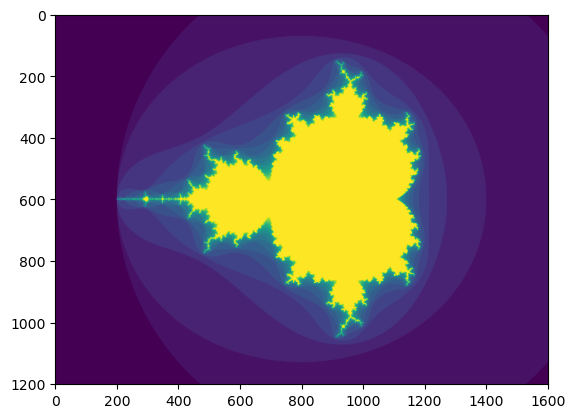

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def mandelbrot(h, w, maxit=20, r=2):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    x = np.linspace(-2.5, 1.5, 4*h+1)
    y = np.linspace(-1.5, 1.5, 3*w+1)
    A, B = np.meshgrid(x, y)
    C = A + B*1j
    z = np.zeros_like(C)
    divtime = maxit + np.zeros(z.shape, dtype=int)
    for i in range(maxit):
        z = z**2 + C
        diverge = abs(z) > r                    # who is diverging
        div_now = diverge & (divtime == maxit)  # who is diverging now
        divtime[div_now] = i                    # note when
        z[diverge] = r                          # avoid diverging too much
    return divtime
plt.clf()
plt.imshow(mandelbrot(400, 400))